<a href="https://colab.research.google.com/github/AlbertP54/Proyecto-Final-2/blob/main/Proyecto_Final_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install pyspark

**Creando sesion de spark e importando algunas librerias necesarias para el proyecto**

In [ ]:
from pyspark.sql import SparkSession
import pyspark
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pyspark.sql.functions import *
from pyspark.sql.types import *
from pyspark.ml.clustering import KMeans

spark = SparkSession.builder.appName('unsupervised_learning').getOrCreate()

**Importando el data set**

In [ ]:
from google.colab import files
uploaded = files.upload()

df = spark.read.csv('music_data.csv', inferSchema=True, header=True)
df.count()

Saving music_data.csv to music_data (2).csv


429023

**Imprimiendo el data set**

In [ ]:
df.printSchema()

root
 |-- user_id: string (nullable = true)
 |-- music category: string (nullable = true)



**Contando el numero de distintas categorias musicales**

In [ ]:
df.select('music category').distinct().count()

21

**Agrupando las categorias musicales y contando el numero de veces que aparecen en el data set**

In [ ]:
df.groupBy('music category').count().orderBy('count', ascending=False).show(100,False)

+-----------------+-----+
|music category   |count|
+-----------------+-----+
|Alternative Music|64227|
|Blues            |54647|
|Classical Music  |43117|
|Country Music    |39891|
|Dance Music      |35779|
|Easy Listening   |34356|
|Electronic Music |30985|
|Rap              |29569|
|Hip Hop          |16895|
|Indie Pop        |16244|
|Motivational     |10118|
|Asian Pop        |8444 |
|Jazz             |7685 |
|Latin Music      |7302 |
|New Age          |7053 |
|Opera            |6188 |
|Hindi Music      |5689 |
|Popular          |4729 |
|Soulful          |2403 |
|Reggae           |1970 |
|Rock             |1732 |
+-----------------+-----+



**Contando el numero de usuarios con diferente Id y gustos musicales diferentes**

In [ ]:
df.select('user_id').distinct().count()

775

**Agrupando de manera descendente los diferentes Id de los usuarios y contando cada ocurrencia de ellos**

In [ ]:
df.groupBy('user_id').count().orderBy('count', ascending=False).show(20,False)

+----------------------------------------------------------------+-----+
|user_id                                                         |count|
+----------------------------------------------------------------+-----+
|628119a73b9725466e6c309f803d30cfc3b11d2a426cdd5f0d62a496e105c914|14257|
|179dd34be075e729f14dadc28a34459226c4f62797af5f186bddbb7428b8fc78|11804|
|2d765ea4ffc6554c95a1c703afcd3470bc118a65c2f0728871f4d0f40628f41b|11001|
|ca60aad85306a7fdd51a469ca6a5d27109dfd5f5781d7da985c70574d2520d23|10479|
|03bfd7e24d3a7ce9e3973f9d42ad89e4c1710b89bec59b2b08712ba73372dcbc|10075|
|7660ca8a4f5df748976aac001d5f0c5b7c8806f5c08197542d26c2eac4b20f85|9932 |
|b6eb8ef9cacc79b6779a7e065c3b0fb5174397ea983d70453bc978b6e46f95e2|7694 |
|e92f348b4a29089c9d7b82095d0bd49422153b60bbde08527015121e44699990|7210 |
|da03e0ef521fecb209f01410eefff11c115fda2d217dde51fd870761b31bb968|7182 |
|04cd1fc5c925a8a702607d6c1a047b8e0cbe170bdaed5270369d321f73254b53|6853 |
|a2374ccb47b0af60aafabeed11b979acf0d72e1afe7f96b671

**Agrupando de manera ascendente los diferentes Id de los usuarios y contando cada ocurrencia de ellos**

In [ ]:
df.groupBy('user_id').count().orderBy('count',ascending=True).show(20,False)

+----------------------------------------------------------------+-----+
|user_id                                                         |count|
+----------------------------------------------------------------+-----+
|402c7aac3776a3758ca143819a0653c6cd33c6c35dd831d9ba5aad1dff43a888|1    |
|a09074b27cd4ab61654c0f4e21bc5e97dc86a611743a1f8b37db3a76df8e306e|1    |
|ecb27d9bf54e751018cd6c1cc5a0f2d812ff08585271acfc980bdacb742a7a02|1    |
|bdb448f271ec83b324acd32248f1401964cb1f5f716e94eebed508f02e889e14|1    |
|e6e6ceb674b7ca53391ac404558a3f8d222db82c643b8c21070db4f029a50095|1    |
|1e3e7153bf1aa5f43b1d1f27c940087587a50d40d399f4cf31b58546a39b9f26|1    |
|54f2e60bd31a775aca7fb60816c6990a415fe66694098d1ee64cc9e13f831a64|1    |
|55efc631da61b192de874d5e2b05ea1e04ec08bd2e3009ebcd0053a84bbd4341|1    |
|ba35ab150a757e0b3abf9c5f11b7686e5394f6cdcb59d257f9fd2e1dd7cf23c2|1    |
|1e6fb89e6aca7641dba8bbd87e97badb8306f1ce50c02c2b0a6f36457e843221|1    |
|d631ffaf7f6731b146cecbf16c02fc543d02f5a8377561e5dd

**Remoldeamos el data set de 2 columnas en una varias columnas e imprimimos las caracteristicas del data set**

In [ ]:
feature_df=df.stat.crosstab("user_id", "music category")
feature_df.printSchema()

root
 |-- user_id_music category: string (nullable = true)
 |-- Alternative Music: long (nullable = true)
 |-- Asian Pop: long (nullable = true)
 |-- Blues: long (nullable = true)
 |-- Classical Music: long (nullable = true)
 |-- Country Music: long (nullable = true)
 |-- Dance Music: long (nullable = true)
 |-- Easy Listening: long (nullable = true)
 |-- Electronic Music: long (nullable = true)
 |-- Hindi Music: long (nullable = true)
 |-- Hip Hop: long (nullable = true)
 |-- Indie Pop: long (nullable = true)
 |-- Jazz: long (nullable = true)
 |-- Latin Music: long (nullable = true)
 |-- Motivational: long (nullable = true)
 |-- New Age: long (nullable = true)
 |-- Opera: long (nullable = true)
 |-- Popular: long (nullable = true)
 |-- Rap: long (nullable = true)
 |-- Reggae: long (nullable = true)
 |-- Rock: long (nullable = true)
 |-- Soulful: long (nullable = true)



**Imprimimos los primeros 3 datos dentro del data set con sus respectivas columnas que remoldeamos anteriormente**

In [ ]:
feature_df.show(3,False)

+----------------------------------------------------------------+-----------------+---------+-----+---------------+-------------+-----------+--------------+----------------+-----------+-------+---------+----+-----------+------------+-------+-----+-------+---+------+----+-------+
|user_id_music category                                          |Alternative Music|Asian Pop|Blues|Classical Music|Country Music|Dance Music|Easy Listening|Electronic Music|Hindi Music|Hip Hop|Indie Pop|Jazz|Latin Music|Motivational|New Age|Opera|Popular|Rap|Reggae|Rock|Soulful|
+----------------------------------------------------------------+-----------------+---------+-----+---------------+-------------+-----------+--------------+----------------+-----------+-------+---------+----+-----------+------------+-------+-----+-------+---+------+----+-------+
|ca3c4285512798abe7d81fa2d0588549211be9516d9b2050e5564f8e912312c7|65               |0        |7    |8              |7            |12         |7             |

**Convertimos el data set remoldeado en un vector unico de caracteristicas y lo imprimimos**

In [ ]:
from pyspark.ml.linalg import Vectors
from pyspark.ml.feature import VectorAssembler

print(feature_df.columns)

['user_id_music category', 'Alternative Music', 'Asian Pop', 'Blues', 'Classical Music', 'Country Music', 'Dance Music', 'Easy Listening', 'Electronic Music', 'Hindi Music', 'Hip Hop', 'Indie Pop', 'Jazz', 'Latin Music', 'Motivational', 'New Age', 'Opera', 'Popular', 'Rap', 'Reggae', 'Rock', 'Soulful']


**Descartamos la columna "user_id_music category" de nuestro data frame**

In [ ]:
feat_cols = [col for col in feature_df.columns if col !='user_id_music category']
print(feat_cols)

['Alternative Music', 'Asian Pop', 'Blues', 'Classical Music', 'Country Music', 'Dance Music', 'Easy Listening', 'Electronic Music', 'Hindi Music', 'Hip Hop', 'Indie Pop', 'Jazz', 'Latin Music', 'Motivational', 'New Age', 'Opera', 'Popular', 'Rap', 'Reggae', 'Rock', 'Soulful']


**Creamos una nueva columna llamada 'features' en nuestro data frame y lo imprimimos**

In [ ]:
vec_assembler = VectorAssembler(inputCols = feat_cols, outputCol='features')
final_data = vec_assembler.transform(feature_df)
final_data.printSchema()

root
 |-- user_id_music category: string (nullable = true)
 |-- Alternative Music: long (nullable = true)
 |-- Asian Pop: long (nullable = true)
 |-- Blues: long (nullable = true)
 |-- Classical Music: long (nullable = true)
 |-- Country Music: long (nullable = true)
 |-- Dance Music: long (nullable = true)
 |-- Easy Listening: long (nullable = true)
 |-- Electronic Music: long (nullable = true)
 |-- Hindi Music: long (nullable = true)
 |-- Hip Hop: long (nullable = true)
 |-- Indie Pop: long (nullable = true)
 |-- Jazz: long (nullable = true)
 |-- Latin Music: long (nullable = true)
 |-- Motivational: long (nullable = true)
 |-- New Age: long (nullable = true)
 |-- Opera: long (nullable = true)
 |-- Popular: long (nullable = true)
 |-- Rap: long (nullable = true)
 |-- Reggae: long (nullable = true)
 |-- Rock: long (nullable = true)
 |-- Soulful: long (nullable = true)
 |-- features: vector (nullable = true)



**Escalamos las caracteristicas del data frame para una mejor comodidad a la hora de implementar el modelo de clustering**

In [ ]:
from pyspark.ml.feature import StandardScaler

scaler = StandardScaler(inputCol="features", outputCol="scaledFeatures", withStd=True, withMean=False)
scalerModel = scaler.fit(final_data)
cluster_final_data = scalerModel.transform(final_data)
cluster_final_data.columns

['user_id_music category',
 'Alternative Music',
 'Asian Pop',
 'Blues',
 'Classical Music',
 'Country Music',
 'Dance Music',
 'Easy Listening',
 'Electronic Music',
 'Hindi Music',
 'Hip Hop',
 'Indie Pop',
 'Jazz',
 'Latin Music',
 'Motivational',
 'New Age',
 'Opera',
 'Popular',
 'Rap',
 'Reggae',
 'Rock',
 'Soulful',
 'features',
 'scaledFeatures']

**Implementamos el evaludar del cluster para obtener el numero de clusters en nuestro data frame**

In [ ]:
from pyspark.ml.evaluation import ClusteringEvaluator

evaluator = ClusteringEvaluator(predictionCol="prediction",
                                featuresCol="scaledFeatures",
                                metricName="silhouette",
                                distanceMeasure="squaredEuclidean")

**Imprimimos el numero de clusters para nuestro data frame asi como el calculo de sus errores**

In [ ]:
silhouette_score = []
print("""
Silhouette Scores for K mean Clustering
=======================================
Model\tScore\t
=====\t=====\t
""")

for k in range(2,10):
  kmeans = KMeans(featuresCol='scaledFeatures',k=k)
  model = kmeans.fit(cluster_final_data)
  wssse = model.transform(cluster_final_data)
  score = evaluator.evaluate(wssse)
  silhouette_score.append(score)
  print("With K={}".format(k))
  print("Within Set Sum of Squared Errors = " + str(silhouette_score))
  print('--'*30)


Silhouette Scores for K mean Clustering
Model	Score	
=====	=====	

With K=2
Within Set Sum of Squared Errors = [0.9490446743667851]
------------------------------------------------------------
With K=3
Within Set Sum of Squared Errors = [0.9490446743667851, 0.9081535019268502]
------------------------------------------------------------
With K=4
Within Set Sum of Squared Errors = [0.9490446743667851, 0.9081535019268502, 0.9048422652898206]
------------------------------------------------------------
With K=5
Within Set Sum of Squared Errors = [0.9490446743667851, 0.9081535019268502, 0.9048422652898206, 0.9020972296722768]
------------------------------------------------------------
With K=6
Within Set Sum of Squared Errors = [0.9490446743667851, 0.9081535019268502, 0.9048422652898206, 0.9020972296722768, 0.7968719323906878]
------------------------------------------------------------
With K=7
Within Set Sum of Squared Errors = [0.9490446743667851, 0.9081535019268502, 0.904842265289820

**Visualizamos el numero de clusters y el error que maneja cada uno de ellos**

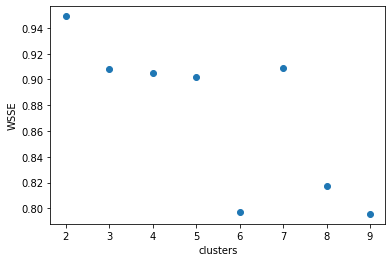

In [ ]:
cluster_number = range(2,10)
plt.scatter(cluster_number, silhouette_score)
plt.xlabel('clusters')
plt.ylabel('WSSE')
plt.show()

**Implementamos 6 clusters en nuestro data frame para obtener nuevas predicciones del data frame**

In [ ]:
kmeans6 = KMeans(featuresCol='scaledFeatures',k=6)
model_k6 = kmeans6.fit(cluster_final_data)
model_k6.transform(cluster_final_data).groupBy('prediction').count().show()

+----------+-----+
|prediction|count|
+----------+-----+
|         1|    1|
|         3|    3|
|         5|   65|
|         4|    1|
|         2|   11|
|         0|  694|
+----------+-----+



**Añadimos la columna de 'prediction' a nuestro data frame y lo imprimimos**

In [ ]:
model_k6.transform(cluster_final_data).show()

+----------------------+-----------------+---------+-----+---------------+-------------+-----------+--------------+----------------+-----------+-------+---------+----+-----------+------------+-------+-----+-------+---+------+----+-------+--------------------+--------------------+----------+
|user_id_music category|Alternative Music|Asian Pop|Blues|Classical Music|Country Music|Dance Music|Easy Listening|Electronic Music|Hindi Music|Hip Hop|Indie Pop|Jazz|Latin Music|Motivational|New Age|Opera|Popular|Rap|Reggae|Rock|Soulful|            features|      scaledFeatures|prediction|
+----------------------+-----------------+---------+-----+---------------+-------------+-----------+--------------+----------------+-----------+-------+---------+----+-----------+------------+-------+-----+-------+---+------+----+-------+--------------------+--------------------+----------+
|  ca3c4285512798abe...|               65|        0|    7|              8|            7|         12|             7|         

**Mostramos el esquema del data frame con la nueva caracteristica 'prediction'**

In [ ]:
cluster_prediction = model_k6.transform(cluster_final_data)
cluster_prediction.printSchema()

root
 |-- user_id_music category: string (nullable = true)
 |-- Alternative Music: long (nullable = true)
 |-- Asian Pop: long (nullable = true)
 |-- Blues: long (nullable = true)
 |-- Classical Music: long (nullable = true)
 |-- Country Music: long (nullable = true)
 |-- Dance Music: long (nullable = true)
 |-- Easy Listening: long (nullable = true)
 |-- Electronic Music: long (nullable = true)
 |-- Hindi Music: long (nullable = true)
 |-- Hip Hop: long (nullable = true)
 |-- Indie Pop: long (nullable = true)
 |-- Jazz: long (nullable = true)
 |-- Latin Music: long (nullable = true)
 |-- Motivational: long (nullable = true)
 |-- New Age: long (nullable = true)
 |-- Opera: long (nullable = true)
 |-- Popular: long (nullable = true)
 |-- Rap: long (nullable = true)
 |-- Reggae: long (nullable = true)
 |-- Rock: long (nullable = true)
 |-- Soulful: long (nullable = true)
 |-- features: vector (nullable = true)
 |-- scaledFeatures: vector (nullable = true)
 |-- prediction: integer (nullab

**Reducmimos el numero de caracteristicas dejando solo las mas importantes para el modelo de clustering con la ayuda de Principal Component Analysis**

In [ ]:
from pyspark.ml.feature import PCA
from pyspark.ml.linalg import Vectors

pca = PCA(k=3, inputCol="scaledFeatures", outputCol="pca_features")
pca_model = pca.fit(cluster_prediction)
result = pca_model.transform(cluster_prediction).select('user_id_music category',"pca_features",'prediction')
result.show(truncate=False)

+----------------------------------------------------------------+-----------------------------------------------------------------+----------+
|user_id_music category                                          |pca_features                                                     |prediction|
+----------------------------------------------------------------+-----------------------------------------------------------------+----------+
|ca3c4285512798abe7d81fa2d0588549211be9516d9b2050e5564f8e912312c7|[-0.22507350265162815,0.1508289363663225,-0.13922132997808223]   |0         |
|b457919ae168ac12ec7e0303ae0d5fe292b63c9d04eb54e039942e7f46552ec4|[-0.5273003162834191,0.10206886950980079,-0.014971360310927773]  |0         |
|a87bb168ba6e5a8da5eccce18c95565d843b40c1833b0f6c3089eb083f0fe3d3|[-0.23968261020295817,0.2801153618243112,-0.17382194436381881]   |0         |
|cf60c9b1a0444261c3a4687677f5336686b96756df5e33c11f6016f16fb38372|[-3.5120515919930146,0.32729433189573726,1.1017302617933296]     |5   

**Separamos el data frame de PCA en 2 columnas**

In [ ]:
clusters = result.toPandas().set_index('user_id_music category')
clusters.head(10)

,pca_features,prediction
user_id_music category,,
ca3c4285512798abe7d81fa2d0588549211be9516d9b2050e5564f8e912312c7,"[-0.22507350265162815, 0.1508289363663225, -0....",0
b457919ae168ac12ec7e0303ae0d5fe292b63c9d04eb54e039942e7f46552ec4,"[-0.5273003162834191, 0.10206886950980079, -0....",0
a87bb168ba6e5a8da5eccce18c95565d843b40c1833b0f6c3089eb083f0fe3d3,"[-0.23968261020295817, 0.2801153618243112, -0....",0
cf60c9b1a0444261c3a4687677f5336686b96756df5e33c11f6016f16fb38372,"[-3.5120515919930146, 0.32729433189573726, 1.1...",5
8ab21c1b361d5c4aa1ed01893305febf1c6659bd342217eece1225d789ba57da,"[-0.6796385576703682, 0.39608053546484023, 0.1...",0
34e22754ffec4a0d434edfa0f3b10c0e1ab14c632cee37514076d211cf1e7017,"[-2.0964050329364157, 0.9121320035474183, 0.99...",0
ad3ea6999df3120ccb557d34cf75e17dfdd3febe445e9e1bc36514642fcd3bdb,"[-0.2944449488892164, 0.38397804726513174, 0.0...",0
3d2ea50eeeb98d4a79259ee057955696ec9dc46e1b72e8d8eff099feb3362e1f,"[-0.9356027216181404, 0.5958240577216134, -0.1...",0
334533d21eeed37dd2b686022857f9f42eef9fa6192a8653040af844be8d15ef,"[-0.13886158277802196, 0.15784222493276157, -0...",0


**Visualizamos la representacion de los clusters en 2d**

Text(0, 0.5, 'Score')

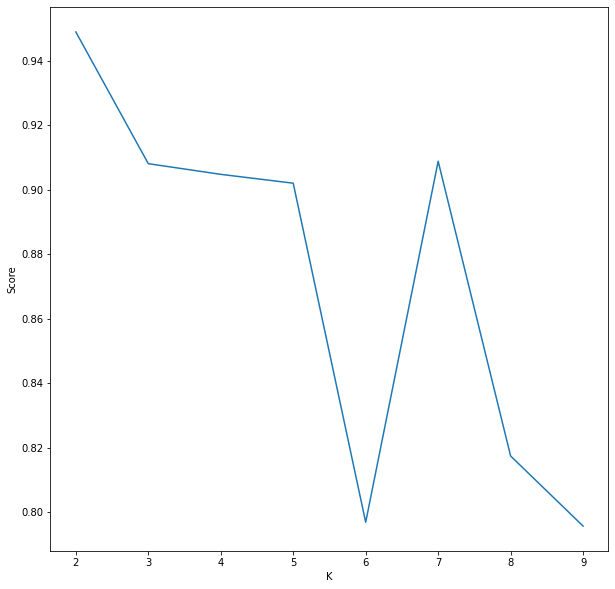

In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(10,10))
ax.plot(range(2,10), silhouette_score)
ax.set_xlabel("K")
ax.set_ylabel("Score")